# Ансамбли моделей машинного обучения.
***
## 1. Описание задания.
1. Выберите набор данных (датасет) для решения задачи классификации или регресии.
2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
4. Обучите две ансамблевые модели. Оцените качество моделей с помощью одной из подходящих для задачи метрик. Сравните качество полученных моделей.

## Выбор набора данных
Будем использовать набор данных "Диабет" для решения задачи регрессии.

In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import *

In [68]:
data = load_boston()

# читаем данные набора
data1 = pd.read_csv('/Users/savelevaa/JupyterNotebooks/data/rk2_data.csv', sep=",")

pd_data = pd.DataFrame(data.data,columns=data.feature_names)
pd_data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Подготовка набора данных к работе

In [46]:
pd_data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

Набор данных не содержит пропусков. Выведем корреляционную матрицу:

<AxesSubplot:>

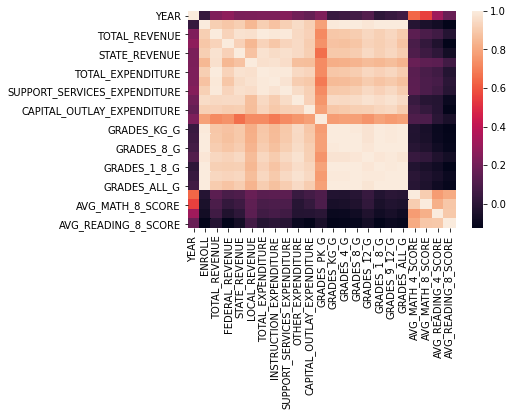

In [70]:
import seaborn as sns

#sns.heatmap(pd_data.corr())
sns.heatmap(data1.corr())

Признак TAX коррелирует почти с половиной других признаков.

## Разделим датасет на обучающую и тестовую выборки
Для этого импортируем и используем метод train_test_split

In [80]:
from sklearn.model_selection import train_test_split

# удалим строки с пропущенными значениями
data1 = data1[data1['FEDERAL_REVENUE'].notna()]
data1 = data1[data1['LOCAL_REVENUE'].notna()]

# суммы пропусков по столбцам
data1.isnull().sum()

X_train, X_test, Y_train, Y_test = train_test_split(
    data1["FEDERAL_REVENUE"].values, data1["LOCAL_REVENUE"].values, test_size=0.5, random_state=1)

## Обучение ансамбевых моделей
### Случайный лес

In [81]:
from sklearn.ensemble import RandomForestRegressor

tree1 = RandomForestRegressor(n_estimators=5, oob_score=True, random_state=2)
tree1.fit(X_train.reshape(-1,1), 
          Y_train)

/Users/savelevaa/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestRegressor(n_estimators=5, oob_score=True, random_state=2)

Процент значений, не попавших в выборку Бутстрапа:

In [82]:
round((1-tree1.oob_score_)*100,2)

46.19

In [83]:
predict1 = tree1.predict(X_test.reshape(-1, 1))

In [88]:
from sklearn.metrics import r2_score

r_score_1 = r2_score(Y_test, predict1)

print(f"оценка R^2 для метода Случайного Леса: {r_score_1}")

оценка R^2 для метода Случайного Леса: 0.7592192075307453


## Градиентный бустинг

In [90]:
from sklearn.ensemble import GradientBoostingRegressor

regr_gb1 = GradientBoostingRegressor(random_state=1)
regr_gb1.fit(X_train.reshape(-1, 1), Y_train.reshape(-1, 1))

/Users/savelevaa/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingRegressor(random_state=1)

In [114]:
predict2 = regr_gb1.predict(X_test.reshape(-1, 1))

In [115]:
r_score_2 = r2_score(Y_test, predict2)

print(f"оценка R^2 для метода Градиентного бустинга: {r_score_2}")

оценка R^2 для метода Градиентного бустинга: 0.7633611166076587


In [117]:
print(f"Random Forest R^2 score: {r_score_1}")
print(f"Random Forest R^2 score: \033[32m{r_score_2}\033[0m")

Random Forest R^2 score: 0.7592192075307453
Random Forest R^2 score: 0.7633611166076587


## Вывод
Ансамблевая модель градиентного бустинга по оценке имеет большую предсказывающую способность, перед моделью Случайного леса.